# **Movie Recommender System**

![Movie Recommendation System](https://fiverr-res.cloudinary.com/images/q_auto,f_auto/gigs/260394461/original/47ffb94567ba58485b8f93d5f35d5189eca1631b/movie-recommendation-system-using-ml-algo.jpg)


In [ ]:
from google.colab import files
uploades = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
from google.colab import files
uploades = files.upload()

Saving movieIdTitles.csv to movieIdTitles.csv


In [ ]:
from google.colab import files
uploades = files.upload()

Saving MovieRecommendations.csv to MovieRecommendations.csv


In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.html.widgets import *
sns.set_style('white')
%matplotlib inline

/usr/local/lib/python3.12/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [4]:
#Get the data into Pandas Dataframe object
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('dataset.csv', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
#Get the Movie Titles
movie_titles = pd.read_csv('movieIdTitles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
#Merge the dataset with movie titles
df = pd.merge(df, movie_titles, on = 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


# **Exploratory Data Analysis**

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

,rating
title,
Aiqing wansui (1994),5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0
"Saint of Fort Washington, The (1993)",5.0
Santa with Muscles (1996),5.0


In [8]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806


In [10]:
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,numOfRatings
title,,
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93


<Axes: >

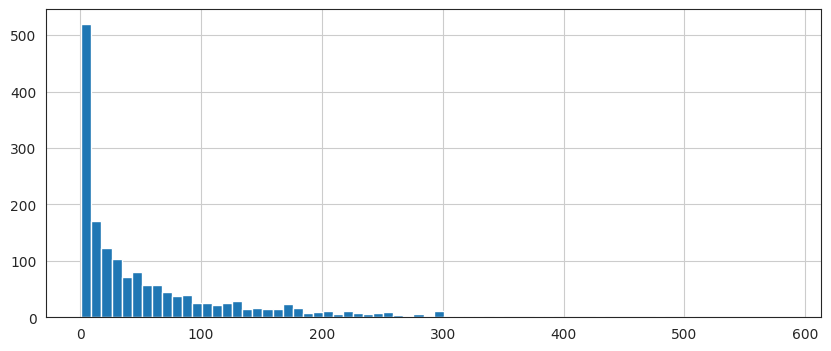

In [11]:
plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)

<Axes: >

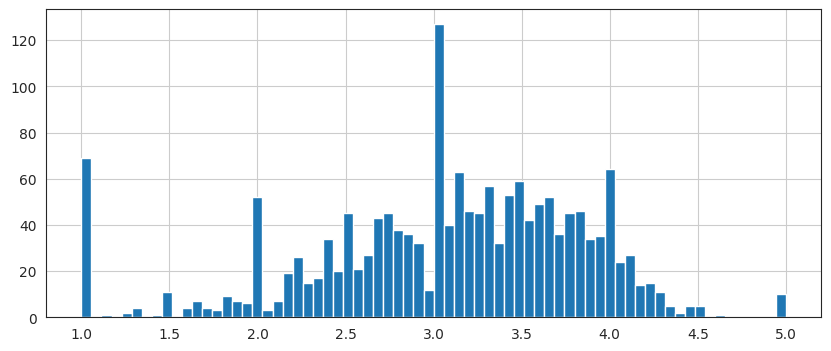

In [12]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

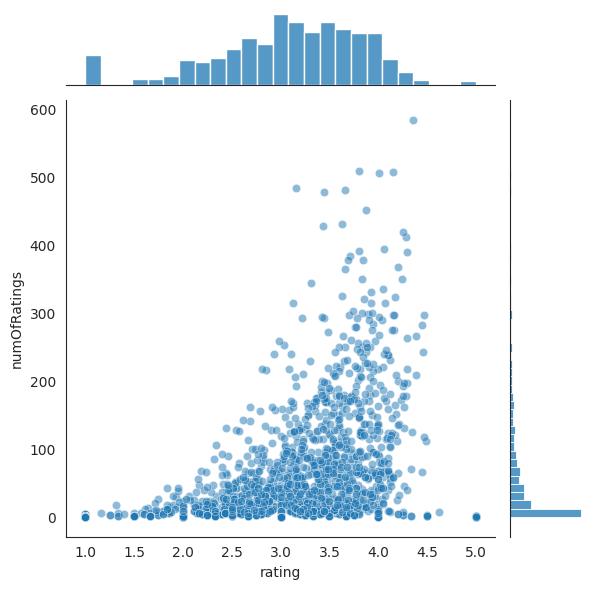

In [13]:
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)

# **The Recommendation System**

In [14]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Now we will create a correlation matrix of every movie with every other movie on user ratings. We will then use that correlation matrix to find top matches that relates the best for a particular movie (having atleast 100 ratings) and the result obtained (recommended movies) will then be added to the ratings dataframe of every movie. Those whose matches could not be obtained using correlation, their value will be converted to "-".

In [16]:
moviemat.corr()

title,1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
1-900 (1994),1.0,NaN,NaN,NaN,NaN,NaN,-9.819805e-01,NaN,NaN,1.000000,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,1.000000e+00,-0.049890,0.269191,0.048973,0.266928,-4.340657e-02,NaN,1.111111e-01,0.522233,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,-4.875600e-17,0.707107,NaN,NaN
12 Angry Men (1957),NaN,-4.989024e-02,1.000000,0.666667,0.256625,0.274772,1.788483e-01,NaN,4.571764e-01,0.635698,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,1.443376e-01,1.000000,1.0,NaN
187 (1997),NaN,2.691910e-01,0.666667,1.000000,0.596644,NaN,-5.547002e-01,NaN,1.000000e+00,-1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,4.753271e-01,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,4.897301e-02,0.256625,0.596644,1.000000,0.240966,3.327241e-01,NaN,1.876619e-16,0.866025,...,NaN,NaN,NaN,0.064559,0.156220,0.132017,2.049262e-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,6.804138e-01,-0.361961,0.500000,0.132017,-0.518476,-1.547646e-01,NaN,-5.455447e-02,-0.240192,...,NaN,NaN,NaN,0.355001,0.722460,1.000000,8.660254e-01,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,-4.875600e-17,0.144338,0.475327,0.204926,0.623795,-3.417534e-01,NaN,7.071068e-01,0.845154,...,NaN,NaN,NaN,-0.413197,-0.019672,0.866025,1.000000e+00,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,7.071068e-01,1.000000,NaN,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [17]:
# SINGLE RECOMMENDATION WORKFLOW

(

    #CALCULATE CORRELATION

    moviemat.corr()

    #SELECT A MOVIE

    .loc[:, ['Shawshank Redemption, The (1994)']]

    #SET CORRELATION COL NAME

    .rename(columns={'Shawshank Redemption, The (1994)': 'Correlation'})

    #REMOVE SAME MOVIE CORRELATION

    .drop('Shawshank Redemption, The (1994)', axis=0)

    #REMOVE MOVIES THAT HAVE NO CO-WATCH / VIEWS

    .dropna()

    #ENRICH DATA WITH AVG. USER RATING & VOTES CASTED

    .join(ratings)

    #REMOVE THOSE WITH NEGATIVE CORRELATION

    .query('Correlation > 0')

    #ASSIGN SCORE (WE CREATED OUR OWN SCORING ENGINE)

    .assign(recom_score=lambda x: x['Correlation']*x['rating'] * x['numOfRatings'])

    #SORT HIGHEST TO LOWEST BASED ON SCORE

    .sort_values(['recom_score'], ascending=[False])

    #GET TOP 5 MOVIES RECOMMENDED TO WATCH NEXT

    .head()
)

,Correlation,rating,numOfRatings,recom_score
title,,,,
Contact (1997),0.302975,3.803536,509,586.558966
Air Force One (1997),0.360807,3.631090,431,564.662603
Liar Liar (1997),0.354533,3.156701,485,542.789361
Chasing Amy (1997),0.366038,3.839050,379,532.584656
Schindler's List (1993),0.359011,4.466443,298,477.843441


In [18]:
import warnings

# Suppress the specific RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

for i in ratings.index:
    movieUserRatings = moviemat[i]
    similarToThatMovie = moviemat.corrwith(movieUserRatings)

    # Create DataFrame with correlation and number of ratings
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns=['Correlation'])
    corr_toMovie.dropna(inplace=True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])

    # Filter movies with sufficient ratings and positive correlation
    corr_toMovie = corr_toMovie[(corr_toMovie['numOfRatings'] > 100) & (corr_toMovie['Correlation'] > 0)]

    # Calculate recommendation score
    corr_toMovie['recom_score'] = corr_toMovie['Correlation'] * ratings.loc[i, 'rating'] * corr_toMovie['numOfRatings']

    # Get top 5 movies recommended to watch next
    result = corr_toMovie.sort_values('recom_score', ascending=False).head()

    # Check if there are recommendations
    if not result.empty:
        # Assign recom score to ratings
        ratings.loc[i, 'recom_score'] = result.iloc[0]['recom_score']

        # Assign recommendations to the ratings DataFrame
        ratings.loc[i, 'FirstMovieRecommendation'] = result.index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.index.values[1]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.index.values[2]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.index.values[3]
        ratings.loc[i, 'FifthMovieRecommendation'] = result.index.values[4]
    else:
        # If no recommendations, set recom_score to NaN and recommendations to None
        ratings.loc[i, 'recom_score'] = np.nan
        ratings.loc[i, 'FirstMovieRecommendation'] = None
        ratings.loc[i, 'SecondMovieRecommendation'] = None
        ratings.loc[i, 'ThirdMovieRecommendation'] = None
        ratings.loc[i, 'FourthMovieRecommendation'] = None
        ratings.loc[i, 'FifthMovieRecommendation'] = None


In [ ]:
#Check the result
ratings.head()

,rating,numOfRatings,recom_score,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation,FifthMovieRecommendation
title,,,,,,,,
'Til There Was You (1997),2.333333,9,1189.432980,Star Wars (1977),Return of the Jedi (1983),Contact (1997),Raiders of the Lost Ark (1981),Air Force One (1997)
1-900 (1994),2.600000,5,1250.600000,"English Patient, The (1996)",Fargo (1996),"Full Monty, The (1997)",Dead Man Walking (1995),Leaving Las Vegas (1995)
101 Dalmatians (1996),2.908257,109,662.605503,Liar Liar (1997),Murder at 1600 (1997),"Rock, The (1996)",Independence Day (ID4) (1996),Star Wars (1977)
12 Angry Men (1957),4.344000,125,702.622227,"English Patient, The (1996)",Toy Story (1995),12 Angry Men (1957),Rear Window (1954),Ulee's Gold (1997)
187 (1997),3.024390,41,891.104926,Toy Story (1995),"Silence of the Lambs, The (1991)",Willy Wonka and the Chocolate Factory (1971),"Truth About Cats & Dogs, The (1996)","Shawshank Redemption, The (1994)"


In [19]:
ratings = ratings.fillna('-')

In [20]:
#Save the ratings data for later use
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

# Load the Saved Recommendation Data Generated for Reusability

In [21]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('MovieRecommendations.csv')
df_result.head()

,title,rating,numOfRatings,recom_score,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation,FifthMovieRecommendation
0,1-900 (1994),2.600000,5,1250.6000000000001,"English Patient, The (1996)",Fargo (1996),"Full Monty, The (1997)",Dead Man Walking (1995),Leaving Las Vegas (1995)
1,101 Dalmatians (1996),2.908257,109,662.6055032097726,Liar Liar (1997),Murder at 1600 (1997),"Rock, The (1996)",Independence Day (ID4) (1996),Star Wars (1977)
2,12 Angry Men (1957),4.344000,125,702.6222268006045,"English Patient, The (1996)",Toy Story (1995),12 Angry Men (1957),Rear Window (1954),Ulee's Gold (1997)
3,187 (1997),3.024390,41,891.104925809165,Toy Story (1995),"Silence of the Lambs, The (1991)",Willy Wonka and the Chocolate Factory (1971),"Truth About Cats & Dogs, The (1996)","Shawshank Redemption, The (1994)"
4,2 Days in the Valley (1996),3.225806,93,610.0959761926167,Chasing Amy (1997),Fargo (1996),"Rock, The (1996)","English Patient, The (1996)",Contact (1997)


In [22]:
#Load all the movie names
for i in df_result['title']:
    print(i)

1-900 (1994)
101 Dalmatians (1996)
12 Angry Men (1957)
187 (1997)
2 Days in the Valley (1996)
20,000 Leagues Under the Sea (1954)
2001: A Space Odyssey (1968)
3 Ninjas: High Noon At Mega Mountain (1998)
39 Steps, The (1935)
8 1/2 (1963)
8 Heads in a Duffel Bag (1997)
8 Seconds (1994)
A Chef in Love (1996)
Above the Rim (1994)
Absolute Power (1997)
Abyss, The (1989)
Ace Ventura: Pet Detective (1994)
Ace Ventura: When Nature Calls (1995)
Across the Sea of Time (1995)
Addams Family Values (1993)
Addicted to Love (1997)
Addiction, The (1995)
Adventures of Pinocchio, The (1996)
Adventures of Priscilla, Queen of the Desert, The (1994)
Adventures of Robin Hood, The (1938)
Affair to Remember, An (1957)
African Queen, The (1951)
Afterglow (1997)
Age of Innocence, The (1993)
Aiqing wansui (1994)
Air Bud (1997)
Air Force One (1997)
Air Up There, The (1994)
Airheads (1994)
Akira (1988)
Aladdin (1992)
Aladdin and the King of Thieves (1996)
Alaska (1996)
Albino Alligator (1996)
Alice in Wonderland (

### How to get Recommendations?
- Select and Press Get Recommendation any movie from the list of Movie Names above

##### You will have your Movie Recommendation for that Particular movie :)

Note:- On every run the paste command will keep on appending the current output. To clear the output just run the below cell again.

In [23]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define options for the dropdown menu
movie_options = df_result['title'].unique()

# Create a dropdown widget for selecting the movie name
inputMovieName = widgets.Dropdown(options=movie_options, description='Select Movie: ')

# Create an output widget to display recommendations
outputRecommendations = widgets.Output()

def getRecommendations(change):
    with outputRecommendations:
        clear_output(wait=True)  # Clear previous recommendations
        searchMovie = change.new
        list_result = df_result[df_result['title'] == searchMovie]
        fm = list_result['FirstMovieRecommendation'].values[0]
        sm = list_result['SecondMovieRecommendation'].values[0]
        tm = list_result['ThirdMovieRecommendation'].values[0]
        fourthm = list_result['FourthMovieRecommendation'].values[0]
        finalRecommendationText = 'Your Recommendations for the Movie ' + searchMovie + ' are:\n' + \
                                   '1: ' + fm + '\n' + \
                                   '2: ' + sm + '\n' + \
                                   '3: ' + tm + '\n' + \
                                   '4: ' + fourthm + '\n'
        print('\n',finalRecommendationText)

# Link the dropdown selection event to the recommendation function
inputMovieName.observe(getRecommendations, names='value')

# Display the dropdown widget
display(inputMovieName)

# Display the output widget for recommendations
display(outputRecommendations)


Dropdown(description='Select Movie: ', options=('1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)'…

Output()